# Taller Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo, etc.

**1.** Encontrar los ceros de $e^{x}-2= \cos(e^x-2)$

### Solución:

Sin importar cuál sea el método para resolver esta ecuación se debe despejar e igualar a cero para facilitar los cálculos

$$ e^x - 2 - cos(e^x -2) = 0 $$
$$ f(x) = e^x - cos(e^x -2) - 2 $$

Veamos gráficamente como se comporta la función en un intervalo de $-25 < x < 25$

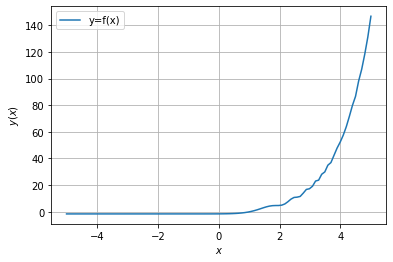

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

x = np.linspace(-5,5,100)
def fx(x):
    y = np.exp(x) - np.cos(np.exp(x)-2) - 2
    return y

plt.figure
plt.plot(x,fx(x),label='y=f(x)')
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.grid()
plt.legend()
plt.show()

In [2]:
for i in np.arange(-5,5,0.5):
    y = fx(i)
    print(i,'->',y)

-5.0 -> -1.583251414445704
-4.5 -> -1.5828710191501811
-4.0 -> -1.5822607556436032
-3.5 -> -1.58129973410632
-3.0 -> -1.5798343037660165
-2.5 -> -1.5777252520248148
-2.0 -> -1.5750077794632529
-1.5 -> -1.5722517626969736
-1.0 -> -1.570834756180591
-0.5 -> -1.5698684497967008
0.0 -> -1.5403023058681398
0.5 -> -1.2902122007865966
1.0 -> -0.034655726394720254
1.5 -> 3.2717404128965573
2.0 -> 4.762858120152077
2.5 -> 10.908901576093001
3.0 -> 17.363475533038773
3.5 -> 30.160255824297444
4.0 -> 53.28842661990634
4.5 -> 87.01851105130454


In [3]:
# MÉTODO DE LA BISECCIÓN

# Elegimos un dos puntos que evaluados en f(x) tengan signos contrarios
a = -0.5
b = 2

from scipy import optimize
x0b = optimize.bisect(fx,a,b)
print(f"Usando el método de la bisección la solución es {x0b}")

Usando el método de la bisección la solución es 1.0076239716574946


In [4]:
print(fx(x0b))

-2.943423282886215e-12


In [5]:
#MÉTODO DE NEWTON

# Para el método de Newton consideramos la derivada de f(x)

dfx = lambda x: mt.exp(x)+mt.exp(x)*np.sin(mt.exp(x)-2)
xi = 0.5

x0n = optimize.newton(fx,xi,dfx)
print(f"Usando el método de Newton la solución es {x0n}")

Usando el método de Newton la solución es 1.0076239716581368


In [6]:
print(fx(x0n))

4.440892098500626e-16


In [7]:
#MÉTODO DE LA SECANTE

# Para el método de la secante usamos la funición anterior pero sin la derivada

x0s = optimize.newton(fx,xi)
print(f"Usando el método de la secante la solución es {x0s}")

Usando el método de la secante la solución es 1.0076239716581368


In [8]:
# Para el método del punto fijo reescribimos la función en términos de x - g(x)
# La reescritura usa el siguiente argumento

Sabemos que inicialmete la ecuación a resolver es:
$$ e^x - \cos (e^x - 2) - 2 = 0 $$
Luego podemos dejar en términos de  $e^x$
$$ e^x = \cos (e^x - 2) + 2 $$
Sacando logaritmo natural a ambos lados tenemos:
$$ x = \ln [\cos (e^x -2) + 2] $$
Por lo tanto tomemos ahora:
$$f(x) = x - \ln [\cos (e^x -2) + 2]$$
\
Luego:
$f(x) = x - g(x)$, donde $g(x) = \ln [\cos (e^x -2) + 2]$

In [9]:
# MÉTODO DEL PUNTO FIJO

# Así tenemos que escribiendo las funciones tenemos

gx = lambda x: np.log( np.cos(mt.exp(x) - 2) + 2 )

# Mientras el punto fijo que para x sería 0.5, para u es e^(0.5)
x_f = 0.5

# Luego el método, al ingresar la función g(x) es

x0p = optimize.fixed_point(gx,x_f)
print(x0p)

1.0076239716581368


In [10]:
# RESULTADO FINAL Y CONCLUSIÓN

# Podemos promediar los valores obtenidos en cada método para hayar el valor más aproximado posible

prom = (x0p+x0s+x0n+x0b)/4
valf = fx(prom)
print("Así, tenemos que el valor de la raíz obtenido es de: {}".format(prom))
print("Que al evaluar en la función nos da {}".format(valf))

Así, tenemos que el valor de la raíz obtenido es de: 1.0076239716579762
Que al evaluar en la función nos da -7.354117315117037e-13


**2.** Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t \right)
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$

### Solución:

Para encontrar el valor de $\omega$ reemplazamos los valores para $x(1) = 0.51$, luego nos resulta la ecuación:

$$ 0.51 + \frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t \right) = 0$$

Luego, como $t = 1$, podemos escribir la función de la siguiente manera:

$$ c\theta(\omega) = 0.51 + \frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t \right) $$

Y cuya derivada está dada por:

$$ \frac{dc\theta}{dw} = -\frac{g\left(w\left(e^w+e^{-w}-2\cos \left(w\right)\right)-2\left(e^w-e^{-w}-2\sin \left(w\right)\right)\right)}{4w^3}$$

In [11]:
# Definamos inicialmente la función y su derivada
g = 9.76
def fw(w):
    im1 = 0.51
    im2 = g/(2*w**2) * ((np.exp(w) - np.exp((-1)*w)) / 2 - np.sin(w))
    ctheta = im1 + im2
    return ctheta
def dfw(w):
    in1 = w*(np.exp(w)+np.exp(-w)-2*np.cos(w))
    in2 = 2*(np.exp(w)-np.exp(-w)-2*np.sin(w))
    in3 = 4*w**3
    return g*(in1-in2)/in3

#Evaluamos la función ctheta en un intervalo para determinar dos valores de signos contrarios

for i in np.arange(-1,1,0.25):
    w = fw(i)
    print(i,'->',w)

-1.0 -> -1.1186034191192158
-0.75 -> -0.7104595607697417
-0.5 -> -0.30339384968390626
-0.25 -> 0.10333144221137336
0.0 -> nan
0.25 -> 0.9166685577886267
0.5 -> 1.3233938496839062
0.75 -> 1.7304595607697417


/tmp/ipykernel_4797/2770638047.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  im2 = g/(2*w**2) * ((np.exp(w) - np.exp((-1)*w)) / 2 - np.sin(w))
/tmp/ipykernel_4797/2770638047.py:5: RuntimeWarning: invalid value encountered in double_scalars
  im2 = g/(2*w**2) * ((np.exp(w) - np.exp((-1)*w)) / 2 - np.sin(w))


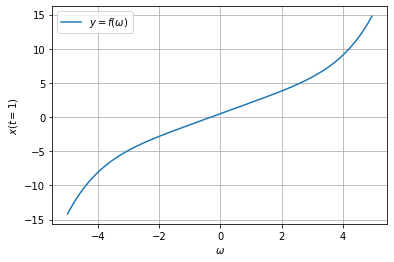

In [12]:
#Realicemos un gráfico para entender la función

wj = np.arange(-5,5,0.05)

plt.figure
plt.plot(wj,fw(wj),label='$y=f(\omega)$')
plt.xlabel("$\omega$")
plt.ylabel("$x(t=1)$")
plt.grid()
plt.legend()
plt.show()

**Rta:** Cuando para el segundo término de la ecuación $\frac{g}{2 \ w}$ el w se hace cero tenemos que para este valor la función no está definida.

De esta forma es necesario para el método de la bisección que los puntos a,b cumplan que $a \not = -b$

In [13]:
#MÉTODO DE LA BISECCIÓN

# Considerando la función en los puntos de forma que evitemos el valor de w = 0, tenemos
a = -1.1
b = -0.25

from scipy import optimize
w0b = optimize.bisect(fw,a,b)
print(f"Usando el método de la bisección la solución es {w0b}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fw(w0b)))

Usando el método de la bisección la solución es -0.3135209839253548

Al evaluar la función en el valor obtenido anteriormente nos resulta 1.94932958663685e-12


In [14]:
#MÉTODO DE NEWTON

wi = 10.5
w0n = optimize.newton(fw,wi,dfw)
print(f"Usando el método de Newton la solución es {w0n}")
print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fw(w0n)))

Usando el método de Newton la solución es -0.31352098392655375

Al evaluar la función en el valor obtenido anteriormente nos resulta -8.881784197001252e-16


In [15]:
# MÉTODO DE LA SECANTE

wi = -0.98

w0s = optimize.newton(fw,wi)
print(f"Usando el método de la secante la solución es {w0s}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fw(w0s)))

Usando el método de la secante la solución es -0.3135209839265525

Al evaluar la función en el valor obtenido anteriormente nos resulta 4.440892098500626e-16


In [16]:
# Escribamos la función g(w) para nuestra función f(w)

Y para el método de punto fijo tenemos la escritura:

$$ c\theta(\omega) = w - \left[ \left( \frac{e^{-\omega}-e^{\omega}}{2} + \sin(w) \right) \frac{g}{1.02w} \right ] $$

$$ g(w) = \left[ \left( \frac{e^{-\omega}-e^{\omega}}{2} + \sin(w) \right) \frac{g}{1.02w} \right ] $$

In [17]:
# MÉTODO DEL PUNTO FIJO

def gw(w):
    g = 9.76
    in1 = (np.exp(-w) - np.exp(w)) / 2 + np.sin(w)
    in2 = g/(w*1.02)
    return in1*in2

#Tomemos un punto inicial definido y no demasiado grande del intervalo anterior, luego:

w_f = -0.98

# Luego el método, al ingresar la función g(x) es

w0p = optimize.fixed_point(gw,w_f)

print(f"Usando el método de Punto Fijo la solución es {w0p}")

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fw(w0p)))

Usando el método de Punto Fijo la solución es -0.3135209839265518

Al evaluar la función en el valor obtenido anteriormente nos resulta 9.992007221626409e-16


**3.** Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)

### Solución:

Despejando la ecuación para igualar a cero y reemplazando los valores tenemos:

$$ f(h) = 12.4 - 10 \left ( \frac{\pi}{2} - \sin (h) - h \sqrt{1 - h^2} \right )   $$

Por lo que podemos ver que la función existe en los reales para $h \leq 1$

También, sabemos que al derivar esta función obtenemos:

$$ \frac{df(h)}{dh} = \frac{10\sqrt{1-h^2}\ \cos(h) + 1-2h^2}{\sqrt{1-h^2}}  $$

La cuál está definida para $ h<1 $

In [18]:
# Definamos la función  y su derivada

def fh(h):
    ih0 = np.pi/2 - np.sin(h) - h*np.sqrt(1-h**2)
    return 12.4 - 10*ih0

def dfh(h):
    ih1 = (1-h**2)**(1/2)
    ih2 = 10*ih1*np.cos(h)+1-2*h**2
    return ih2/ih1

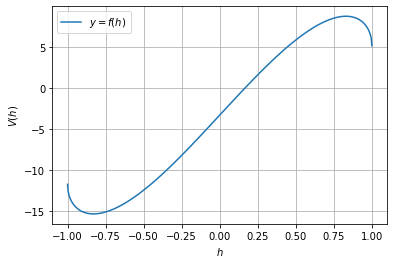

In [19]:
# Grafiquemos la función para entender mejor el proceso

hj = np.linspace(-1,1,500)

plt.figure
plt.plot(hj,fh(hj),label='$y=f(h)$')
plt.xlabel("$h$")
plt.ylabel("$V(h)$")
plt.grid()
plt.legend()
plt.show()

In [20]:
# Encontremos dos valores para los cuales la función evaluada tenga signo negativo
h = np.linspace(-1,1,10)
for i in h:
    print(i,'->',fh(i))

-1.0 -> -11.722673116027932
-0.7777777777777778 -> -15.213581504286276
-0.5555555555555556 -> -13.20144723279594
-0.33333333333333337 -> -9.722607041184032
-0.11111111111111116 -> -5.521020653048394
0.11111111111111116 -> -1.0949058828495364
0.33333333333333326 -> 3.1066805052861
0.5555555555555554 -> 6.5855206968980085
0.7777777777777777 -> 8.597654968388346
1.0 -> 5.10674658013


In [21]:
# METODO DE LA BISECCIÓN

# Hallemos el 0 de la función usando los valores -0.42 y 0.9

a = -0.42
b = 0.9

from scipy import optimize
h0b = optimize.bisect(fh,a,b)
print(f"Usando el método de la bisección la solución es {h0b}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fh(h0b)))

Usando el método de la bisección la solución es 0.16695713869357862

Al evaluar la función en el valor obtenido anteriormente nos resulta -1.248778858098376e-11


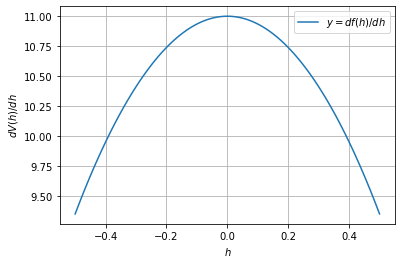

In [22]:
# Veamos ahora, como se comporta la gráfica para la derivada

hk = np.linspace(-0.5,0.5,100)


plt.figure
plt.plot(hk,dfh(hk),label='$y=df(h)/dh$')
plt.xlabel("$h$")
plt.ylabel("$dV(h)/dh$")
plt.grid()
plt.legend()
plt.show()

In [23]:
h = np.linspace(-0.5,0.5,10)
for i in h:
    print(i,'->',dfh(i))

-0.5 -> 9.353175888093352
-0.3888888888888889 -> 10.0104376916082
-0.2777777777777778 -> 10.496995725815752
-0.16666666666666669 -> 10.81927380432157
-0.05555555555555558 -> 10.979936273721
0.05555555555555558 -> 10.979936273721
0.16666666666666663 -> 10.81927380432157
0.2777777777777777 -> 10.496995725815754
0.38888888888888884 -> 10.0104376916082
0.5 -> 9.353175888093352


In [24]:
#MÉTODO DE NEWTON

# Hallemos el cero de la función para desde un punto inicial cercano a 0 por los negativos 
hi = 0.16
h0n = optimize.newton(fh,hi,dfh,maxiter=100)

print(f"Usando el método de Newton la solución es {h0n}")

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fh(h0n)))

Usando el método de Newton la solución es 0.1669571334133202

Al evaluar la función en el valor obtenido anteriormente nos resulta -1.0264949779070776e-07


**Análisis :**
A pesar del error obtenido con el método, vemos que después de 50 iteraciones el tiene calculado internamente el valor de $\approx 0.1669558$. El cuál concuerda con el valor hallado con el método de la bisección.

Luego las iteraciones debieron ser modificadas pues al usar las 50 por defecto

In [25]:
# MÉTODO DE LA SECANTE

# Hallemos el cero de la función para desde un punto inicial cercano a -1 
hi = 0.5
h0s = optimize.newton(fh,hi)
print(f"Usando el método de la secante la solución es {h0s}")

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fh(h0s)))

Usando el método de la secante la solución es 0.16695713869422085

Al evaluar la función en el valor obtenido anteriormente nos resulta -3.552713678800501e-15


Luego reescribiendo nuestra función para usar el método del punto fijo tenemos:

$$ f(h) = h - g(h) $$
$$ f(h) = h - \sin ^{-1} \left [ \frac{\pi}{2} - 1.24 - h \sqrt{1-h^2}  \right ]   $$

Pero si no queremos que quede en términos de arcsin entonces:

$$ g(h) = \frac{1}{\sqrt{1-h^2}} \left[ \frac{\pi}{2} - 1.24 - \sin (h)  \right] $$

In [26]:
#MÉTODO DE PUNTO FIJO

# Escribimos la función g(h):

def gh(h):
    ih3 = np.pi/2 - 1.24 - h*(1-h**2)**(1/2)
    return np.arcsin(ih3)

#Tomemos un punto inicial definido y no demasiado grande del intervalo anterior, luego:

h_f = 0.5

# Luego el método, al ingresar la función g(x) es

h0p = optimize.fixed_point(gh,h_f)
print(f"Usando el método del punto fijo la solución es {h0p}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fh(h0p)))

Usando el método del punto fijo la solución es 0.16695713869422102

Al evaluar la función en el valor obtenido anteriormente nos resulta 0.0


### Conclusión:
Así, el valor de la altura de agua en el reservorio es de aproximadamente 0.16696 pies.

**4.** Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indentifica el ángulo máximo $\alpha$ que puede alcanzar un vehículo cuando $\beta$ es el ángulo máximo en que no ocurre la falla por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde: 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}

\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el ángulo se aproximara a 33°. Verificar este resultado.


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden

In [27]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Colocamos los valores de las variables dados:

l = 89 #pg
h = 49 #pg
D = 55 #pg
𝛽 = np.deg2rad(11.5) #grados --> radianes

# Definimos los parámetros como una función de las variables anteriores:

def init_param(l,h,D,𝛽):
    A = l*np.sin(𝛽)
    B = l*np.cos(𝛽)
    C = (h+0.5*D)*np.sin(𝛽) - 0.5*D*np.tan(𝛽)
    E = (h+0.5*D)*np.cos(𝛽) - 0.5*D
    
    return A,B,C,E

print(init_param(l,h,D,𝛽))

(17.74374616313055, 87.21329871125383, 9.656708748763851, 47.464239903493464)


In [28]:
# Asociemos los valores de la función con los parámetros:

A,B,C,E = init_param(l,h,D,𝛽)
params = init_param(l,h,D,𝛽)

In [29]:
# Definimos la función f(alpha):

def fa(𝛼,A,B,C,E):
    ia1 = A*np.sin(𝛼) + B*(np.sin(𝛼))**2
    ia2 = -C*np.cos(𝛼) - E*np.sin(𝛼)
    return ia1 + ia2

# Definimos su derivada:

def dfa(𝛼,A,B,C,E):
    ia1 = A*np.cos(2*𝛼) + B*np.sin(2*𝛼)
    ia2 = C*np.sin(𝛼) - E*np.cos(𝛼)
    return ia1 + ia2

In [30]:
fa(0.2,*params)

-11.926502543909354

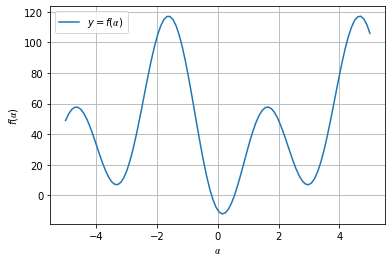

In [31]:
# Grafiquemos la función para ver dos valores que evaluados den signos contrarios

alp = np.linspace(-5,5,100)
plt.figure
plt.plot(alp,fa(alp,*params),label='$y=f(𝛼)$',)
plt.xlabel("$𝛼$")
plt.ylabel("$f(𝛼)$")
plt.grid()
plt.legend()
plt.show()

### Análisis:

Vemos que la función tiene muchos ceros por lo que  nuestra intención es encontrar las aproximaciones a $33°$, para demostrar lo dicho anteriormente, así que nuestra intención es escoger los valores que nos lleven a este cero, donde sabemos que dicho valor en radianes de forma que lo podemos ver en la gráfica es de $\alpha \approx 0.58\ rad$

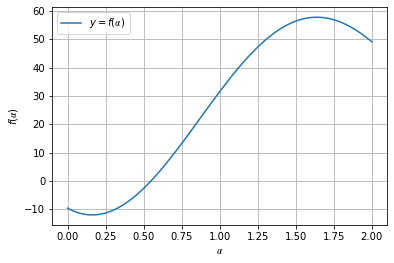

In [32]:
# Veamos entonces esta función en el rango donde tenemos a este valor entre los puntos 0 y 2

alp = np.linspace(0,2,100)
plt.figure
plt.plot(alp,fa(alp,*params),label='$y=f(𝛼)$',)
plt.xlabel("$𝛼$")
plt.ylabel("$f(𝛼)$")
plt.grid()
plt.legend()
plt.show()

In [33]:
valg = 33
valr = valg*np.pi/180
print(valr)

0.5759586531581288


In [34]:
# MÉTODO DE LA BISECCIÓN

# Consideremos dos puntos de signo contrario en 'y' y cuyo 'x' esté entre -1 y 1 y encierren el 0.5

a = 0
b = 0.75

a0b = optimize.bisect(fa,a,b,args=params)

print(f"Con este método, la solución es {a0b} o  en grados {a0b*180/np.pi}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fa(a0b,*params)))

Con este método, la solución es 0.5489589188259743 o  en grados 31.453029174793077

Al evaluar la función en el valor obtenido anteriormente nos resulta -2.4627411221445072e-11


In [35]:
# MÉTODO DE NEWTON

# Consideremos un punto con pendiente positiva cercano a nuestro posible cero

a1 = 0.32

a0n = optimize.newton(fa,a1,dfa,args=params)

print(f"Con este método, la solución es {a0n} o en grados {a0n*180/np.pi}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fa(a0n,*params)))

Con este método, la solución es 0.5489589191861113 o en grados 31.45302919542741

Al evaluar la función en el valor obtenido anteriormente nos resulta 2.062125048496455e-08


In [36]:
# MÉTODO DE LA SECANTE

a1 = 1
a0s = optimize.newton(fa,a1,args=params)

print(f"Con este método, la solución es {a0s} o en grados {a0s*180/np.pi}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fa(a0s,*params)))

Con este método, la solución es 0.5489589188264038 o en grados 31.45302917481769

Al evaluar la función en el valor obtenido anteriormente nos resulta -7.105427357601002e-15


### Solución:

Podemos usando las ecuaciones anteriores escribir la función:

$$ f(\alpha) =  A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha) $$

Con los parámetros y variables definidas anteriormente. Luego, veamos que $\alpha = 33°$ cuando las variables tienen los valores mencionados anteriormente.

Luego, al determinar la derivada tenemos que:

$$ \frac{df(\alpha)}{d\alpha} = A\cos(2\alpha) + B\sin(2\alpha) + C\sin(\alpha) - E\cos(\alpha)$$

#### Reescritura:

Para el método del punto fijo y teniendo en cuenta la imagen de la función $\sin^{-1}$ reescribimos nuestra función como:

$$ f(\alpha) = \alpha - \sin^{-1} \left[ \frac{A}{E} \sin (\alpha) \cos(\alpha) + \frac{B}{E} \sin^2 (\alpha) - \frac{C}{E} \cos(\alpha) \right] $$

In [63]:
np.abs(1-dfa(0.55,*params))

49.356638043700244

In [72]:
# MÉTODO DEL PUNTO FIJO

# Escribamos la función g(𝛼):

def ga(𝛼,A,B,C,E):
    ig1 = (A/E)*np.sin(𝛼)*np.cos(𝛼)
    ig2 = (B/E)*(np.sin(𝛼))**2
    ig3 = (C/E)*np.cos(𝛼)
    
    return 2*𝛼-np.arcsin(ig1+ig2-ig3)

# Usemos el método para hallar el punto

a1 = 0.25
a0p = optimize.fixed_point(ga,a1,args=params)

print(f"Con este método, la solución es {a0p} o en grados {a0p*180/np.pi}")

#Comprobemos que se cumple para este valor

print("\nAl evaluar la función en el valor obtenido anteriormente nos resulta {}".format(fa(a0p,*params)))

Con este método, la solución es 0.5754730121943988 o en grados 32.97217482241961

Al evaluar la función en el valor obtenido anteriormente nos resulta 1.5553581030370722


## Teorema 2.4 del burden

Estabilidad de los puntos puede ser de muchas formas:

$$ f(x) = x - g(x) $$
$$ f(x) = g(x) -x $$

/tmp/ipykernel_4797/1700036697.py:8: RuntimeWarning: invalid value encountered in arcsin
  plt.plot(alpha, np.arcsin(ga_arg(alpha,A,B,C,E)))


(-1.0, 2.0)

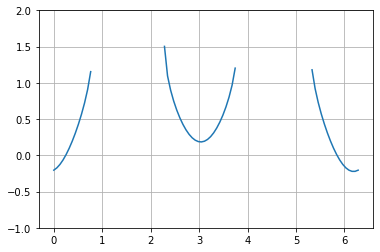

In [71]:
def ga_arg(𝛼,A,B,C,E):
    ig1 = (A/E)*np.sin(𝛼)*np.cos(𝛼)
    ig2 = (B/E)*(np.sin(𝛼))**2
    ig3 = (C/E)*np.cos(𝛼)
    
    return ig1+ig2-ig3
alpha=np.linspace(0,2*np.pi, 100)
plt.plot(alpha, np.arcsin(ga_arg(alpha,A,B,C,E)))
plt.grid()
plt.ylim(-1,2)
#plt.hlines(1, 0, 2*np.pi)

In [ ]:
print(ga(0.25,*params))

# Pregunta:

¿Por qué solo converge para un valor demasiado cercano como es $ \alpha_1 =0.5$ y no para los otros valores cercanos?

In [ ]:
prom_a = (a0n+a0s+a0b)/3
print(prom_a,prom_a*180/np.pi)

### Análisis (Excluye la pregunta anterior)

Al verificar los demás métodos vemos que en realidad el valor que debe tener $\alpha$ es de $\approx 0.549\ rad$ o $31.45°$

**5.** Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

### Solución:

Sabemos que el valor del segmento circular es $1/4$ de toda el área del círculo, luego podemos escribir esto como la siguiente ecuación:


$$ A_{seg} = \frac{Ac}{4} $$

Donde el área del segmento circular está dado por:

$$ A_{seg} = \frac{R^2\ (\theta - \sin \theta)}{2} $$

Luego haciendo las manipulaciones algebraicas tenemos:

$$\theta-\sin \theta = \frac{\pi}{2}$$

Así, podemos escribi una función asociada a esta ecuación y su derivada como:

$$f(\theta)=\theta-\sin \theta - \frac{\pi}{2} $$

$$ \frac{df(\theta)}{d\theta} = 1 - \cos(\theta) $$

In [73]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

In [74]:
# Definamos la función en términos de 𝜃 y su derivada:

f = lambda theta: theta - np.sin(theta) - 0.5 * np.pi
df = lambda theta: 1 - np.cos(theta)

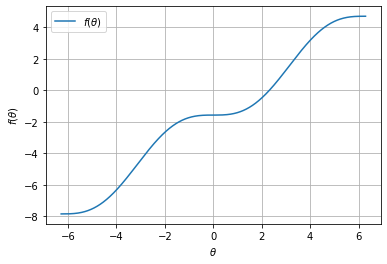

In [75]:
# Realicemos la gráfica en un intervalo completo de la función sin(x), i.e de -2pi a 2pi

theta = np.linspace(-2*np.pi, 2*np.pi, 1000)

plt.figure(figsize=(6,4))
plt.plot(theta, f(theta), label="$f(\\theta)$")
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.legend()

plt.show()

In [76]:
# MÉTODO DE LA BISECCIÓN

th0b = optimize.bisect(f, a=1, b=4, xtol=1E-12)
print(f"La raiz de f(𝜃) es {th0b}")
print("Al evaluar este valor en la función nos da como resultado {}".format(f(th0b)))

La raiz de f(𝜃) es 2.309881460009592
Al evaluar este valor en la función nos da como resultado -7.784883848671598e-13


In [79]:
# MÉTODO DE NEWTON

th1 = 1

th0n = optimize.newton(f,th1,df)
print(f"La raiz de f(𝜃) es {th0n}")
print("Al evaluar este valor en la función nos da como resultado {}".format(f(th0n)))

La raiz de f(𝜃) es 2.309881460010057
Al evaluar este valor en la función nos da como resultado -4.440892098500626e-16


In [77]:
# MÉTODO DE LA SECANTE

th1 = 0.5

th0s = optimize.newton(f,th1)
print(f"La raiz de f(𝜃) es {th0s}")
print("Al evaluar este valor en la función nos da como resultado {}".format(f(th0s)))

La raiz de f(𝜃) es 2.3098814600100575
Al evaluar este valor en la función nos da como resultado 4.440892098500626e-16


In [81]:
# MÉTODO DEL PUNTO FIJO

# Definamos la función g(𝜃) para el f(𝜃) inicial:

g = lambda theta: np.sin(theta) + 0.5 * np.pi

# Encontremos el valor de la raíz con este método:

th1 = 0.5

th0p = optimize.fixed_point(g,th1)
print(f"La raiz de f(𝜃) es {th0p}")
print("Al evaluar este valor en la función nos da como resultado {}".format(f(th0p)))

La raiz de f(𝜃) es 2.309881460010057
Al evaluar este valor en la función nos da como resultado -4.440892098500626e-16


# Pregunta:

¿Por qué el método anterior nos arroja hacia el valor de $\pi$ y no hacia el 0 como los demás valores?